In [32]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

In [16]:
import torchvision

In [59]:
transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,),(0.3081,))])

In [12]:
train_dataset = MNIST(root='./data', train=True, transform=transform, download = True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size= 4, shuffle=True)
test_loader =  DataLoader(test_dataset, batch_size=4, shuffle=False)

In [13]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")

In [14]:
dataiter = iter(train_loader)
images,labels = next(dataiter)
print(images.shape,labels.shape)
print(images[0].shape,labels[0].shape,labels[0])

torch.Size([4, 1, 224, 224]) torch.Size([4])
torch.Size([1, 224, 224]) torch.Size([]) tensor(9)


In [15]:
def imshow(img,title):
    npimg = img.numpy()/2 + 0.5
    plt.figure(figsize = (4,1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.title(title)
    plt.show()

In [17]:
def show_batch(dataloader):
    images,labels = next(iter(train_loader))
    img = torchvision.utils.make_grid(images)
    imshow(img,[str(x.item()) for x in labels])

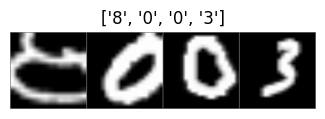

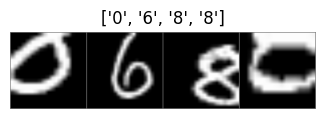

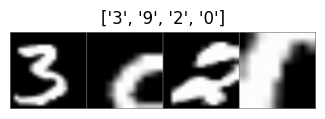

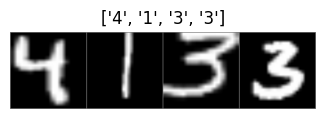

In [22]:
for i in range(4):
    show_batch(train_loader)

In [19]:
num_classes = 10

In [20]:
from torchvision import models

In [62]:
resnet = models.resnet18(pretrained = True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [29]:
print(resnet)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [63]:
for param in resnet.parameters():
    param.requires_grad = False

In [64]:
new_in = resnet.fc.in_features
resnet.fc = nn.Linear(new_in, num_classes)

In [65]:
resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

In [66]:
resnet = resnet.to(device)
criterion = nn.CrossEntropyLoss()
opt = optim.SGD(resnet.parameters(), lr = 0.01)

In [67]:
for param in resnet.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([64, 1, 7, 7])
torch.Size([10, 512])
torch.Size([10])


In [60]:
batch_size = 64

In [61]:
train_dataset = MNIST(root='./data', train=True, transform=transform, download = True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size= batch_size , shuffle=True)
test_loader =  DataLoader(test_dataset, batch_size= batch_size, shuffle=False)

In [68]:
def evaluation(dataloader,model):
    total,correct = 0,0
    for data in dataloader:
        inputs,labels = data
        inputs,labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.detach(),1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100*correct/total

In [69]:
import copy

Min Loss : 2.28
Min Loss : 2.26
Min Loss : 2.20
Min Loss : 2.18
Min Loss : 2.15
Min Loss : 2.11
Min Loss : 2.04
Min Loss : 2.03
Min Loss : 1.99
Min Loss : 1.99
Min Loss : 1.99
Min Loss : 1.90
Min Loss : 1.86
Min Loss : 1.86
Min Loss : 1.82
Min Loss : 1.79
Min Loss : 1.78
Min Loss : 1.76
Min Loss : 1.63
Min Loss : 1.57
Min Loss : 1.55
Min Loss : 1.53
Min Loss : 1.50
Min Loss : 1.43
Min Loss : 1.40
Min Loss : 1.37
Min Loss : 1.36
Min Loss : 1.32
Min Loss : 1.24
Min Loss : 1.16
Min Loss : 1.13
Min Loss : 0.95
Min Loss : 0.93
Min Loss : 0.91
Min Loss : 0.89
Min Loss : 0.81
Min Loss : 0.76
Min Loss : 0.74
Min Loss : 0.73
Min Loss : 0.70
Min Loss : 0.68
Min Loss : 0.65
Min Loss : 0.55
Epoch: 0/5 |Test_Acc: 71.71 | Train_Acc: 71.33
Min Loss : 0.53
Min Loss : 0.53
Epoch: 1/5 |Test_Acc: 74.51 | Train_Acc: 74.28
Min Loss : 0.52
Min Loss : 0.41
Epoch: 2/5 |Test_Acc: 70.83 | Train_Acc: 69.97
Epoch: 3/5 |Test_Acc: 75.91 | Train_Acc: 75.78
Min Loss : 0.39
Min Loss : 0.36
Min Loss : 0.34
Epoch: 4/5 |

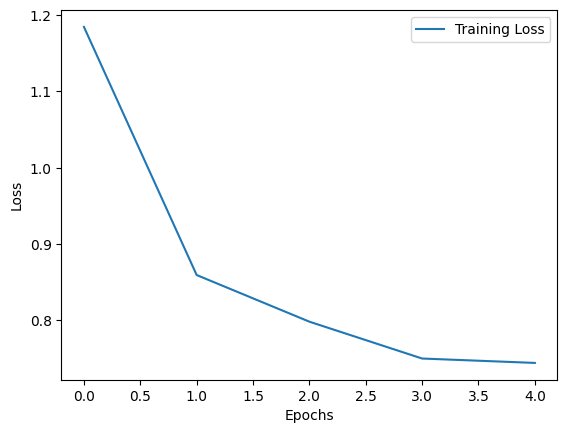

In [71]:
loss_epoch_arr = []
epochs = 5
min_loss = 1000
for epoch in range(epochs):
    epoch_loss = 0
    for data in train_loader:
        inputs,labels = data
        inputs,labels = inputs.to(device), labels.to(device)
        opt.zero_grad()

        outputs = resnet(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        opt.step()
        epoch_loss += loss.item()

        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(resnet.state_dict())
            print('Min Loss : {:.2f}'.format(min_loss))

        del inputs,labels,outputs
        torch.cuda.empty_cache()

    loss_epoch_arr.append(epoch_loss/len(train_loader))
    print('Epoch: {}/{} |Test_Acc: {:.2f} | Train_Acc: {:.2f}'.format(
    epoch, epochs,evaluation(test_loader,resnet),evaluation(train_loader,resnet)))

plt.plot(loss_epoch_arr, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [74]:
resnet.load_state_dict(best_model)
print(evaluation(train_loader,resnet),evaluation(test_loader,resnet))

75.855 74.95


In [75]:
import torch.nn.functional as F

In [76]:
def predict(model,image,device):
    model.eval()
    if len(image.shape) == 3:  # Shape: [1, 224, 224]
        image = image.unsqueeze(0)
    image = image.to(device)
    with torch.no_grad():
        output = model(image)
        probabilities = F.softmax(output, dim = 1)
        predicted_class = torch.argmax(probabilities, dim=1).item()
    return predicted_class, probabilities.cpu().numpy()

True Label: 1
Predicted Label: 4


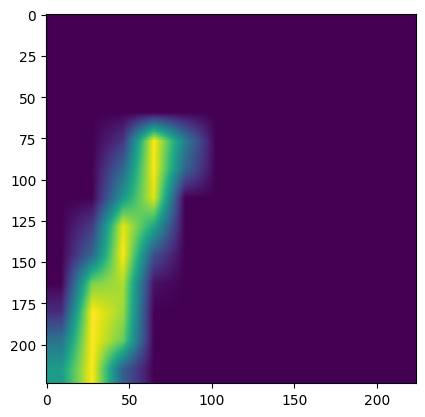

In [77]:
image,label = next(iter(test_loader))
image = image[2]
predicted_label, confidence_scores = predict(resnet, image, device)

print(f"True Label: {label[2].item()}")
print(f"Predicted Label: {predicted_label}")
plt.imshow(np.transpose(image, (1,2,0)))
plt.show()

In [72]:
import pandas as pd

def predict_all(model, test_loader, device):

    model.eval()
    predictions = []

    with torch.no_grad():
        for images, _ in test_loader:
            images = images.to(device)
            outputs = model(images)
            predicted_labels = torch.argmax(outputs, dim=1)

            predictions.extend(predicted_labels.cpu().tolist())
    df = pd.DataFrame({"ImageId": range(1, len(predictions) + 1), "Label": predictions})
    df.to_csv("mnist_predictions.csv", index=False)
    print("Predictions saved to mnist_predictions.csv")
    return df
df_predictions = predict_all(resnet, test_loader, device)

Predictions saved to mnist_predictions.csv


In [73]:
print(df_predictions.head(10))

   ImageId  Label
0        1      7
1        2      2
2        3      4
3        4      0
4        5      4
5        6      1
6        7      7
7        8      9
8        9      5
9       10      9
